## 1.Download flower dataset

## 2.Image Augmentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_gen = ImageDataGenerator(rescale=1./255,
                               zoom_range=0.2,
                               horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1./255)

In [3]:
xtrain = train_gen.flow_from_directory('flowers-dataset/flowers',
                                       target_size=(64,64),
                                       class_mode='categorical',
                                       batch_size=100)

Found 4317 images belonging to 5 classes.


## 3.Create Model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [5]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())

model.add(Dense(400,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(5,activation='softmax'))

## 4.Compile Model

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
early_stopping = EarlyStopping(monitor='accuracy',
                        patience=3)
reduce_lr = ReduceLROnPlateau(monitor='accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

## 5.Fit Model

In [9]:
model.fit(xtrain,
                    steps_per_epoch = len(xtrain),
                    callbacks=callback,
                    epochs=100)

Epoch 1/100
44/44 [==============================] - 52s 1s/step - loss: 1.2045 - accuracy: 0.4959 - lr: 0.0010
Epoch 2/100
44/44 [==============================] - 37s 833ms/step - loss: 1.0977 - accuracy: 0.5696 - lr: 0.0010
Epoch 3/100
44/44 [==============================] - 36s 815ms/step - loss: 1.0152 - accuracy: 0.5960 - lr: 0.0010
Epoch 4/100
44/44 [==============================] - 35s 786ms/step - loss: 0.9521 - accuracy: 0.6317 - lr: 0.0010
Epoch 5/100
44/44 [==============================] - 35s 787ms/step - loss: 0.9199 - accuracy: 0.6442 - lr: 0.0010
Epoch 6/100
44/44 [==============================] - 36s 811ms/step - loss: 0.8733 - accuracy: 0.6627 - lr: 0.0010
Epoch 7/100
44/44 [==============================] - 35s 805ms/step - loss: 0.8305 - accuracy: 0.6778 - lr: 0.0010
Epoch 8/100
44/44 [==============================] - 35s 800ms/step - loss: 0.8026 - accuracy: 0.6963 - lr: 0.0010
Epoch 9/100
44/44 [==============================] - 35s 796ms/step - loss: 0.7649 

## 6.Save Model

In [10]:
model.save('flower_cnn.h5')

## 7.Test Model

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image

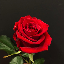

In [19]:
img = image.load_img('Flowers-Dataset/test_image.jpg',target_size=(64,64))
img

In [20]:
h = image.img_to_array(img)
h

array([[[42., 39., 32.],
        [44., 41., 34.],
        [44., 41., 34.],
        ...,
        [44., 41., 36.],
        [44., 41., 34.],
        [45., 42., 35.]],

       [[43., 40., 35.],
        [43., 40., 33.],
        [44., 41., 34.],
        ...,
        [44., 39., 36.],
        [45., 42., 35.],
        [45., 42., 35.]],

       [[44., 41., 36.],
        [43., 40., 33.],
        [43., 40., 33.],
        ...,
        [44., 39., 36.],
        [42., 38., 35.],
        [44., 41., 36.]],

       ...,

       [[31., 26., 20.],
        [33., 24., 19.],
        [33., 24., 19.],
        ...,
        [28., 25., 20.],
        [29., 26., 21.],
        [30., 27., 22.]],

       [[30., 25., 19.],
        [33., 24., 19.],
        [32., 23., 18.],
        ...,
        [28., 24., 21.],
        [28., 25., 20.],
        [31., 28., 23.]],

       [[33., 24., 19.],
        [32., 23., 18.],
        [31., 22., 17.],
        ...,
        [28., 25., 20.],
        [28., 24., 21.],
        [30., 27., 22.]]

In [21]:
h= np.expand_dims(h,axis= 0)
h

array([[[[42., 39., 32.],
         [44., 41., 34.],
         [44., 41., 34.],
         ...,
         [44., 41., 36.],
         [44., 41., 34.],
         [45., 42., 35.]],

        [[43., 40., 35.],
         [43., 40., 33.],
         [44., 41., 34.],
         ...,
         [44., 39., 36.],
         [45., 42., 35.],
         [45., 42., 35.]],

        [[44., 41., 36.],
         [43., 40., 33.],
         [43., 40., 33.],
         ...,
         [44., 39., 36.],
         [42., 38., 35.],
         [44., 41., 36.]],

        ...,

        [[31., 26., 20.],
         [33., 24., 19.],
         [33., 24., 19.],
         ...,
         [28., 25., 20.],
         [29., 26., 21.],
         [30., 27., 22.]],

        [[30., 25., 19.],
         [33., 24., 19.],
         [32., 23., 18.],
         ...,
         [28., 24., 21.],
         [28., 25., 20.],
         [31., 28., 23.]],

        [[33., 24., 19.],
         [32., 23., 18.],
         [31., 22., 17.],
         ...,
         [28., 25., 20.],
        

In [22]:
val = list(xtrain.class_indices.keys())
val

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [23]:
val[np.argmax(model.predict(h))]

1/1 [==============================] - 0s 279ms/step


'rose'